<a href="https://colab.research.google.com/github/jaisakthism/Few-Shot-Semantic-Segmentation-Papers/blob/master/wbc_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATADIR = "drive/MyDrive/LISC Database/LISC Database/Ground Truth Segmentation"
CATEGORIES = ['Baso/areaforexpert1','eosi/areaforexpert1','lymp/areaforexpert1','mixt/areaforexpert1','mono/areaforexpert1','neut/areaforexpert1']

In [ ]:
VALIDDIR = "drive/MyDrive/LISC Database/LISC Database/Main Dataset"
CATEGORIESV = ['Baso','eosi','lymp','mixt','mono','neut']

In [ ]:
IMG_SIZE = 225

In [ ]:
training_data = []

def create_training_data(): 
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category) #creating indexes for each of the type of WBCs
    for img in os.listdir(path):
      try: #if image is broken pass it
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #reading the images in grayscale
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
validation_data = []

def create_validation_data(): 
  for category in CATEGORIESV:
    path = os.path.join(VALIDDIR, category)
    class_num = CATEGORIESV.index(category) #creating indexes for each of the type of WBCs
    for img in os.listdir(path):
      try: #if image is broken pass it
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #reading the images in grayscale
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        validation_data.append([new_array, class_num])
      except Exception as e:
        pass

create_validation_data()

In [ ]:
print(len(training_data))

250


In [ ]:
#lets check for balanced data

import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
2
4
4
1
1
5
5
2
0


In [ ]:
X = []
y = []

In [ ]:
for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)#1 because grayscale

In [ ]:
#saving our data so we dont have to do it everytime

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [ ]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [ ]:
len(X)

250

In [ ]:
X = X/255.0

In [ ]:
y = np.array(y)

In [ ]:
model = Sequential()
#First Layer of the CNN
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Second Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Final Layer
model.add(Flatten())#required as Dense requires 1D data
model.add(Dense(64))

In [ ]:
#Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy']
              )

In [ ]:
model.fit(X, y, batch_size = 10, validation_split = 0.1)

23/23 [==============================] - 30s 1s/step - loss: 0.0000e+00 - accuracy: 0.1600 - val_loss: 0.0000e+00 - val_accuracy: 0.0800


**VGG16**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(1, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=x)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_path = '/content/drive/MyDrive/DATA/train_data'
valid_path = '/content/drive/MyDrive/DATA/test_data'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 )
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            )

Found 250 images belonging to 6 classes.
Found 250 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(
  training_set,  
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15


ValueError: ignored

**InceptionV3**

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.1):
      print("\nReached 10% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
train_dir = '/content/drive/MyDrive/DATA/train_data'
validation_dir = '/content/drive/MyDrive/DATA/test_data'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 250 images belonging to 6 classes.
Found 250 images belonging to 6 classes.


In [ ]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 15,
            validation_steps = 50,
            verbose = 2,
            callbacks=None)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


100/100 - 277s - loss: 1.2409 - acc: 0.6208 - val_loss: 2.5963 - val_acc: 0.1505 - 277s/epoch - 3s/step
Epoch 2/15
100/100 - 177s - loss: 1.1221 - acc: 0.6383 - val_loss: 3.0213 - val_acc: 0.2268 - 177s/epoch - 2s/step
Epoch 3/15
100/100 - 176s - loss: 0.9985 - acc: 0.6833 - val_loss: 3.5123 - val_acc: 0.1464 - 176s/epoch - 2s/step
Epoch 4/15
100/100 - 180s - loss: 1.0480 - acc: 0.6521 - val_loss: 4.1872 - val_acc: 0.1629 - 180s/epoch - 2s/step
Epoch 5/15
100/100 - 177s - loss: 0.9079 - acc: 0.7094 - val_loss: 5.1736 - val_acc: 0.1825 - 177s/epoch - 2s/step
Epoch 6/15
100/100 - 177s - loss: 0.9226 - acc: 0.7135 - val_loss: 3.5406 - val_acc: 0.1969 - 177s/epoch - 2s/step
Epoch 7/15
100/100 - 173s - loss: 0.8872 - acc: 0.7219 - val_loss: 5.2683 - val_acc: 0.1515 - 173s/epoch - 2s/step
Epoch 8/15
100/100 - 176s - loss: 0.8875 - acc: 0.7125 - val_loss: 5.3150 - val_acc: 0.1670 - 176s/epoch - 2s/step
Epoch 9/15
100/100 - 177s - loss: 0.8418 - acc: 0.7259 - val_loss: 5.0700 - val_acc: 0.1794

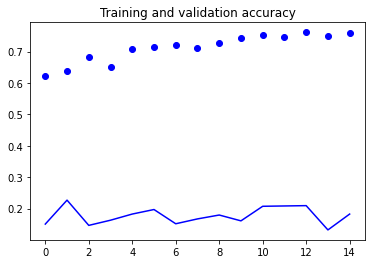

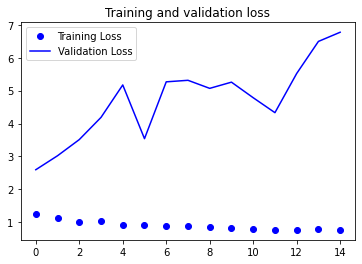

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()